In [129]:
import pandas as pd
# ランダムフォレストで予測モデルを作成
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [130]:
df = pd.read_csv('clean_result_data.csv')

In [131]:
# データとラベルに分割
data = df.iloc[:,0:len(df.columns)-1]
label = df.iloc[:,len(df.columns)-1:]

In [132]:
# 不要な文字を削除
data['money'] = data['money'].str.strip('"')
data['money'] = data['money'].str.replace(",", "")
# result_rankは結果なので予測時では使用しない
data.drop(labels=["result_rank"], axis=1, inplace=True)
data.head()

,distance,frame_number,horse_number,age,loaf_weight,time,up,tansyo,popular,weight,...,weather_light_snow,weather_sunny,weather_cloudy,weather_rain,ground_dirt,ground_grass,ground_status_bad,ground_status_slightly_heavy,ground_status_good,ground_status_heavy
0,1600,5,6,3,56.0,96.1,34.3,41.0,10.0,492,...,0,1,0,0,0,1,0,0,1,0
1,1200,5,9,4,57.0,72.4,36.9,4.8,2.0,476,...,0,1,0,0,1,0,0,1,0,0
2,1200,5,10,4,55.0,72.4,36.6,53.2,9.0,484,...,0,1,0,0,1,0,0,1,0,0
3,1200,2,3,5,57.0,72.7,36.9,24.3,7.0,474,...,0,1,0,0,1,0,0,1,0,0
4,1200,7,14,4,57.0,72.8,37.2,23.1,6.0,534,...,0,1,0,0,1,0,0,1,0,0


In [133]:
label.head(15)

,place_top_three
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [134]:
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

In [135]:
# 予測モデル作成
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

C:\Users\hiros\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [136]:
print("訓練結果: {:.3f}".format(forest.score(X_train, y_train)))
print("テスト結果: {:.3f}".format(forest.score(X_test, y_test)))

訓練結果: 1.000
テスト結果: 0.993


In [137]:
# 特徴量の重要度を見る
print("特徴量の重要度　:\n{}".format(forest.feature_importances_))

特徴量の重要度　:
[7.62246125e-03 8.16159856e-03 1.16051211e-02 2.41293607e-02
 1.07462034e-02 2.18749698e-02 3.33670978e-02 9.07587003e-02
 6.15273137e-02 1.74948055e-02 6.91647988e-01 2.00358021e-03
 1.77485450e-03 7.97518001e-04 7.68992736e-04 1.57032077e-05
 2.28358629e-03 2.19851858e-03 1.05061578e-03 2.09355036e-03
 2.36759371e-03 6.55989126e-04 1.90738303e-03 2.07678109e-03
 1.06971353e-03]


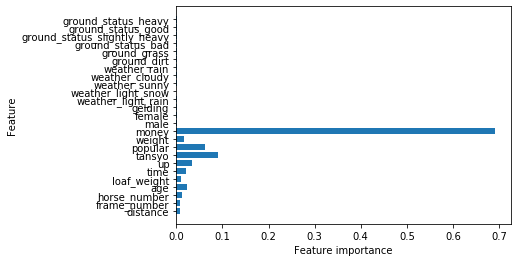

In [138]:
# 特徴量の重要度を可視化
def plot_feature_importances(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest)